Normal distribution

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as stats 

import seaborn as sns
sns.set(style='ticks')

Text(0.5, 1.0, 'Shifted Normal Distribution')

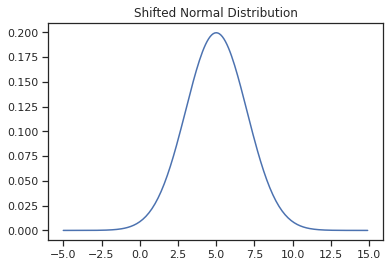

In [ ]:
'''PDF, scatter plot, and histogram.'''
# Generate the data
x = np.arange(-5,15,0.1)
# Plot a normal distribution: "Probability density functions"
myMean = 5
mySD = 2
y = stats.norm(myMean, mySD).pdf(x)
plt.plot(x,y)
plt.title('Shifted Normal Distribution')

Text(0.5, 1.0, 'Shifted Normal Distribution')

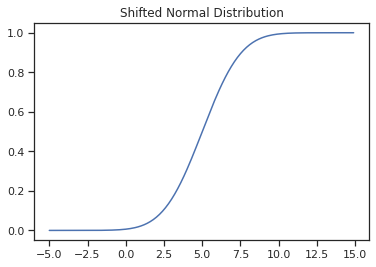

In [ ]:
'''CDF, scatter plot, and histogram.'''
# Generate the data
x = np.arange(-5,15,0.1)
# Plot a normal distribution: "Probability density functions"
myMean = 5
mySD = 2
y = stats.norm(myMean, mySD).cdf(x)
plt.plot(x,y)
plt.title('Shifted Normal Distribution')

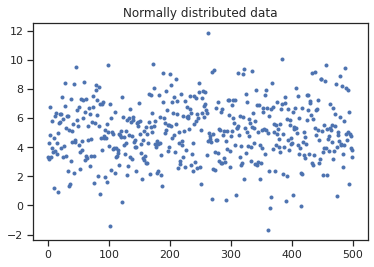

In [ ]:
# Random numbers with a normal distribution
numData = 500
data = stats.norm.rvs(myMean, mySD, size = numData)
plt.plot(data, '.')
plt.title('Normally distributed data')
plt.show()

Text(0.5, 1.0, 'Histogram of normally distributed data')

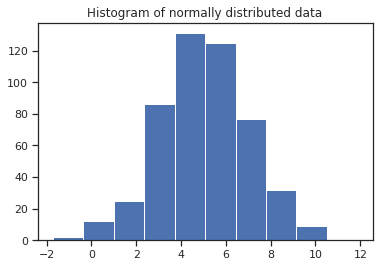

In [ ]:
plt.hist(data)
plt.title('Histogram of normally distributed data')


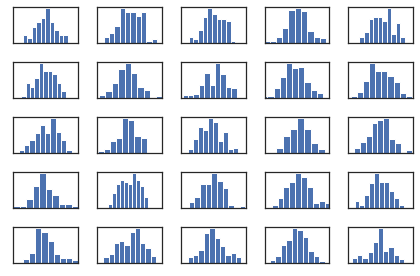

In [ ]:
'''Show multiple samples from the same distribution, and compare means.'''
# Do this 25 times, and show the histograms
numRows = 5
numData = 100
for ii in range(numRows):
    for jj in range(numRows):
        data = stats.norm.rvs(myMean, mySD, size=numData)
        plt.subplot(numRows,numRows,numRows*ii+jj+1)
        plt.hist(data)

        plt.xticks([])
        plt.yticks([])
        plt.xlim(myMean-3*mySD, myMean+3*mySD)

plt.tight_layout()
plt.show()

In [ ]:
# Check out the mean of 1000 normally distributded samples
numTrials = 1000;
numData = 100
myMeans = np.ones(numTrials)*np.nan
for ii in range(numTrials):
    data = stats.norm.rvs(myMean, mySD, size=numData)
    myMeans[ii] = np.mean(data)
print('The standard error of the mean, with {0} samples, is {1:5.3f}'.format(numData, np.std(myMeans, ddof=1)))

The standard error of the mean, with 100 samples, is 0.206


In [ ]:
# in theory, the se for means, size of samples = 100
se = mySD / np.sqrt(numData)
se

0.2

(array([ 1.,  1.,  2., 11., 15., 24., 21., 11.,  7.,  7.]),
 array([-0.29695683,  0.61699754,  1.53095191,  2.44490628,  3.35886066,
         4.27281503,  5.1867694 ,  6.10072377,  7.01467814,  7.92863252,
         8.84258689]),
 <a list of 10 Patch objects>)

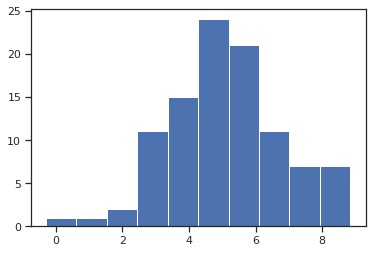

In [ ]:
'''Check if the distribution is normal.'''
# Generate and show a distribution
numData = 100
data = stats.norm.rvs(myMean, mySD, size=numData)
plt.hist(data)

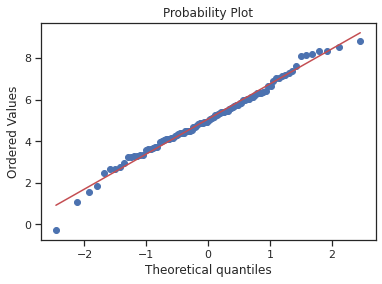

In [ ]:
# Graphical test: if the data lie on a line, they are pretty much
# normally distributed
_ = stats.probplot(data, plot=plt)

In [ ]:
# The scipy "normaltest" is based on D’Agostino and Pearson’s test that
# combines skew and kurtosis to produce an omnibus test of normality.
_, pVal = stats.normaltest(data)
pVal

0.42118393768426077

In [ ]:
# Or you can check for normality with Kolmogorov-Smirnov 
# test: but this is only advisable for large sample numbers!

_,pVal = stats.kstest((data-np.mean(data))/np.std(data,ddof=1), 'norm')
if pVal > 0.05:
    print('Data are probably normally distributed')

Data are probably normally distributed


In [ ]:
'''Calculate an empirical cumulative distribution function, compare it with 
the exact one, andfind the exact point for a specific data value.'''

# Generate normally distributed random data
myMean = 5
mySD = 2
numData = 1000
data = stats.norm.rvs(myMean, mySD, size=numData)

# Calculate the cumulative distribution function, CDF
numbins = 20
counts, bin_edges = np.histogram(data, bins=numbins, density=True)
cdf = np.cumsum(counts)
cdf /= max(cdf)

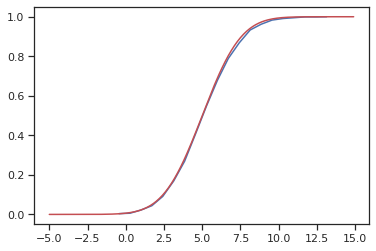

In [ ]:
# compare with the exact CDF
plt.plot(bin_edges[1:],cdf)
plt.plot(x, stats.norm.cdf(x, myMean, mySD),'r')

In [ ]:
# Find out the value corresponding to the x-th percentile: the
# "cumulative distribution function"
value = 2
myMean = 5
mySD = 2
cdf = stats.norm.cdf(value, myMean, mySD)
print(('With a threshold of {0:4.2f}, you get {1}% of the \
                        data'.format(value, round(cdf*100))))

With a threshold of 2.00, you get 7% of the                         data


In [ ]:
# For the percentile corresponding to a certain value: 
# the "inverse cumulative distribution function" 
value = 0.025
icdf = stats.norm.isf(value, myMean, mySD)
print('To get {0}% of the data, you need a threshold \
                  of {1:4.2f}.'.format((1-value)*100, icdf))


To get 97.5% of the data, you need a threshold                   of 8.92.


In [20]:
# a simple test on the mean
from scipy import stats
nd = stats.norm(3.5, 0.76)
nd.cdf(2.6)

0.11816486815719918